# StatisticiAN

Created by Achuth Nair (AN), StatisticiAN is an custom application that allows you to pick the games, players, actions, and stats you want to see. Browse our list of games to choose from, and allow the application to direct your curiosity! 

To do list: 

    1. Single Player Analysis
       Completed:
        a. Team -> Player -> Events for that Player
        b. Introduce what type of analysis can be run 
            i. Passing
            ii. Pressures
        c. Put in Pass Maps! 
        To-Do:
        a. Think of any other Heat Map functions
        b. Start putting in others - Pass Maps
        c. Put in Convex Hulls?
    
    2. 

#### Current Games available: 
    1) World Cup Final 2018

#### How To Run:

    1. Run all the cells except for the first one after this markdown. Then go back and run the statisticiAN() call!
    2. Please follow the integer inputs - I haven't coded error handling yet :) 

Here are the available games: 
1) WCF 2018 - France v Croatia
Which games would you like to see?/n Enter the number associated with the game. 1
What team would you like to analyze?: 

0 -  France 	 1 -  Croatia 

Enter the number associated with the team you'd like to analyze: 0
Here are the players available for analysis: 

0 - Hugo Lloris
1 - Benjamin Pavard
2 - Raphaël Varane
3 - Samuel Yves Umtiti
4 - Lucas Hernández Pi
5 - Paul Pogba
6 - N'Golo Kanté
7 - Kylian Mbappé Lottin
8 - Blaise Matuidi
9 - Antoine Griezmann
10 - Olivier Giroud

Enter the number associated with the player you'd like to analyze: 
5
You chose:  Paul Pogba

Analysis Options: 
0 - Heat Maps
1 - Pass Maps

Which of the above types of analyses would you like to carry out?: 1
Pass Maps visualize a player's attempted passes for the game, giving you an idea of their passing range and efficacy. 
Here is your player's map: 


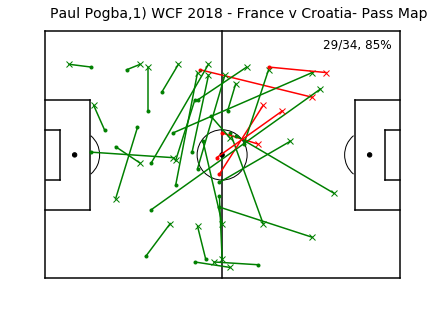

Do you wish to continue? 1 to continue, any other key to exit: 1
Here are the available games: 
1) WCF 2018 - France v Croatia
Which games would you like to see?/n Enter the number associated with the game. 1
What team would you like to analyze?: 

0 -  France 	 1 -  Croatia 

Enter the number associated with the team you'd like to analyze: 1
Here are the players available for analysis: 

0 - Danijel Subašić
1 - Šime Vrsaljko
2 - Dejan Lovren
3 - Domagoj Vida
4 - Ivan Strinić
5 - Marcelo Brozović
6 - Luka Modrić
7 - Ivan Rakitić
8 - Ante Rebić
9 - Ivan Perišić
10 - Mario Mandžukić

Enter the number associated with the player you'd like to analyze: 
4
You chose:  Ivan Strinić

Analysis Options: 
0 - Heat Maps
1 - Pass Maps

Which of the above types of analyses would you like to carry out?: 1
Pass Maps visualize a player's attempted passes for the game, giving you an idea of their passing range and efficacy. 
Here is your player's map: 


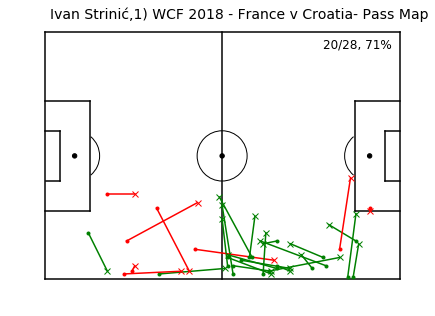

In [ ]:
statisticiAN()

In [ ]:
# import json 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sns

%matplotlib inline

In [3]:
games = [["8658.json", "1) WCF 2018 - France v Croatia"]]

In [21]:
def statisticiAN():
    loop = True

    while (loop):

        print("Here are the available games: ")
        for i in range(len(games)):
            print(games[i][1])
        gameNumber = int(input("Which games would you like to see?/n Enter the number associated with the game. "))
        title = games[gameNumber-1][1]
        data = loadJson(gameNumber, games)
        print("What team would you like to analyze?: \n")
        print("0 - ", data[0]["team"]["name"], "\t", "1 - ", data[1]["team"]["name"], "\n" )
        teamNumber = int(input("Enter the number associated with the team you'd like to analyze: "))
        playerNames = loadPlayerNames(data, teamNumber)

        print("Here are the players available for analysis: \n")
        for item in playerNames:

            print(item[0], "-", item[1])

        playerNumber = int(input("\nEnter the number associated with the player you'd like to analyze: \n"))

        specificPlayer = playerNames[playerNumber][1]
        print("You chose: ", specificPlayer)

        # Take all data for that specific player - Works
        completePlayerData = loadPlayerData(data, specificPlayer)
        
        print("\nAnalysis Options: ")
        analysisOptions = ["Heat Maps", "Pass Maps"]
        simpleCount = 0
        for option in analysisOptions:
            print(simpleCount, "-", option)
            simpleCount += 1
        
        analysisNumber = int(input("\nWhich of the above types of analyses would you like to carry out?: "))
        
        # HEAT MAPS
        if (analysisNumber == 0):  
            print("Heat maps are great tools to visualize player events in a location-based analysis. Since we don't have GPS data, please choose an event type to track: ")
            eventTypesForHeatMapsForDisplay = ["Passing Heat Map", "Defensive Pressure Heat Map"]
            eventTypesForHeatMaps = ["pass", "Pressure"]
            count = 0
            for entry in eventTypesForHeatMapsForDisplay: 
                print(count, "-", entry)
                count += 1 
            
            analysisTypeNumber = int(input("\nWhich type of heat map would you like?: "))
            generateHeatMap(completePlayerData, specificPlayer, eventTypesForHeatMaps[analysisTypeNumber], title)
            
        # PASS MAPS
        if(analysisNumber == 1):
            print("Pass Maps visualize a player's attempted passes for the game, giving you an idea of their passing range and efficacy. \nHere is your player's map: ")
            generatePassMap(completePlayerData, specificPlayer, title)
            
        exit = int(input("Do you wish to continue? 1 to continue, any other key to exit: "))
        if (exit != 1): 
            loop = False
        
    
        

In [14]:
def loadJson(gameNumber, games):
    
    with open(games[gameNumber-1][0],'r') as f:
        data = json.load(f) #loads json in form of dictionaries 
        f.close()
    return data
        
        
    
    

In [15]:
def loadPlayerNames(data, teamNumber):
    
    jsonData = data
    teamOnePlayerNames = []
    teamTwoPlayerNames = []
    simpleCount = 0
    teamOnePlayers = data[0]["tactics"]["lineup"]
    teamTwoPlayers = data[1]["tactics"]["lineup"]
    for i in range(0, len(teamOnePlayers)):
        if("player" in teamOnePlayers[i]):
            toAppend = []
            toAppend.append(simpleCount)
            toAppend.append(teamOnePlayers[i]["player"]["name"])
            teamOnePlayerNames.append(toAppend)
                                       
        
        simpleCount += 1
        
    simpleCount = 0
    for i in range(0, len(teamTwoPlayers)):
        if("player" in teamTwoPlayers[i]):
            toAppend = []
            toAppend.append(simpleCount)
            toAppend.append(teamTwoPlayers[i]["player"]["name"])
            teamTwoPlayerNames.append(toAppend)
                                       
        
        simpleCount += 1   
    
    if teamNumber == 0:                             
        return teamOnePlayerNames
    else:
        return teamTwoPlayerNames
    

In [16]:
def loadPlayerData(data, playerName):
    
    playerData = []
    
    for i in range(0, len(data)):
        if ("player" in data[i]):
            if data[i]["player"]["name"] == playerName:
                playerData.append(data[i])
            
    return playerData

In [26]:
def generatePassMap(data, playerName, title):
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    makePitchMarkings(playerName, fig, ax, title, "Pass Map")
    
    passData = []
    eventData = []
    
    #Created in the order of the lists created
    player = "" 
    startLocation = [] 
    endLocation = []
    complete = True
    
    for i in range(0, len(data)):
        if("pass" in data[i]):
            startLocation = data[i]["location"]
            endLocation = data[i]["pass"]["end_location"]
            player = data[i]["player"]["name"]
            if("outcome" in data[i]['pass']):
                complete = False
            else:
                complete = True
            eventData = [player, startLocation, endLocation, complete]
            passData.append(eventData)
            
    #My arrays are as such - player name (0), start(x,y) (1), end(x,y) (2), complete (bool) (3
    #This for loop is redundant, haven't changed it yet
    playerPasses = []
    
    for i in range(0, len(passData)):
        if(passData[i][0] == playerName):
            playerPasses.append(passData[i])
   
    complete = 0
    for i in range(0, len(passData)):
        
        if(playerPasses[i][3] == True):
            complete += 1 # for completion percentage 

        xstart = int(playerPasses[i][1][0])
        xend = int(playerPasses[i][2][0])
        ystart = int(playerPasses[i][1][1])
        yend = int(playerPasses[i][2][1])
        if(playerPasses[i][3] == False):
            plt.plot([xstart, xend], [ystart, yend], color = "red")
            plt.plot(xstart, ystart, ".", color = "red")
            plt.plot(xend, yend, "x", color = "red")
        else:
            plt.plot([xstart, xend], [ystart, yend], color = "green")
            plt.plot(xstart, ystart, ".", color = "green")
            plt.plot(xend, yend, "x", color = "green")

    
    # some code for pass statistics - simple completion percentage
    stats = []
    stats.append(complete)
    stats.append(len(playerPasses))
    stats.append(int(complete/len(playerPasses)*100))
    
    #Put this on the plot 
    percentageText = f"{stats[0]}/{stats[1]}, {stats[2]}% "
    ax.text(102, 84, percentageText, color = "black", size = "12")
    
    plt.show()
    

In [18]:
def generateHeatMap(data, playerName, action, title):
    
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    makePitchMarkings(playerName, fig, ax, title, action)
    
    actionData = []
    eventData = []
    
    #Created in the order of the lists created
    player = "" 
    complete = True

    if(action == "pass"):
        for i in range(0, len(data)):
            if(action in data[i]):
                location = data[i]["location"] #heatMaps only require the location of the action
                player = data[i]["player"]["name"] #These might be unecessary, since i've already cut down data by player
                if (player == playerName): # could be useful later though
                    #if("outcome" in data[i][action]):
                    #    complete = False
                    #else:
                    #    complete = True
                    eventData = [location]
                    actionData.append(eventData)  
    
    if action == "Pressure":
        for i in range(0, len(data)):
            if action == data[i]["type"]["name"]:
                eventData = [data[i]["location"]]
                actionData.append(eventData)
                
    

    xstart = [] #putting in this form for kdeplot 
    ystart = []
    for i in range(0, len(actionData)):
        xstart.append(actionData[i][0][0])
        ystart.append(actionData[i][0][1])
        
    locations = [xstart, ystart]
    
    sns.kdeplot(locations[0], locations[1], shade = "True", n_levels=5)
    plt.ylim(0, 90)
    plt.xlim(0, 130)
    
    plt.show()
    

In [19]:
def makePitchMarkings(player, fig, ax, matchName, action):

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color="black")
    plt.plot([0,130],[90,90], color="black")
    plt.plot([130,130],[90,0], color="black")
    plt.plot([130,0],[0,0], color="black")
    plt.plot([65,65],[0,90], color="black")

    #Left Penalty Area
    plt.plot([16.5,16.5],[65,25],color="black")
    plt.plot([0,16.5],[65,65],color="black")
    plt.plot([16.5,0],[25,25],color="black")

    #Right Penalty Area
    plt.plot([130,113.5],[65,65],color="black")
    plt.plot([113.5,113.5],[65,25],color="black")
    plt.plot([113.5,130],[25,25],color="black")

    #Left 6-yard Box
    plt.plot([0,5.5],[54,54],color="black")
    plt.plot([5.5,5.5],[54,36],color="black")
    plt.plot([5.5,0.5],[36,36],color="black")

    #Right 6-yard Box
    plt.plot([130,124.5],[54,54],color="black")
    plt.plot([124.5,124.5],[54,36],color="black")
    plt.plot([124.5,130],[36,36],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
    centreSpot = plt.Circle((65,45),0.8,color="black")
    leftPenSpot = plt.Circle((11,45),0.8,color="black")
    rightPenSpot = plt.Circle((119,45),0.8,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    #Tidy Axes
    plt.axis('off')
    
    if (action == "pass"):
        header = player + ", " + matchName + " - Passing Heat Map"
    elif action == "Pressure":
        header = player + ", " + matchName + " - Defensive Pressures Heat Map"
    elif action == "Pass Map":
        header = player + "," + matchName + "- Pass Map"
    else:
        header = player + ", " + matchName
        
    ax.text(2,95, header ,color="black",size="14")